### 1. 나이브베이즈(가우시안)를 이용
#### 와인 등급을 예측하는 모델을 만들고, 모델 성능을 평가하시오.
- prior 값을 변경하면서 성능비교
- datasets.load_wine() 으로 데이터를 불러와 사용 

In [8]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve

In [9]:
wine=load_wine()

In [18]:
wine_df=pd.DataFrame(wine.data,columns=wine.feature_names)
wine_df["target"]=pd.DataFrame(wine.target)
wine_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [19]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [26]:
x_train,x_test,y_train,y_test=train_test_split(wine.data,wine.target,train_size=0.7,test_size=0.3,
                                              random_state=102)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(124, 13) (54, 13) (124,) (54,)


In [21]:
cif=GaussianNB()
cif.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
y_pred=cif.predict(x_test)

In [27]:
y_pred

array([2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1,
       0, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 1, 2, 2,
       0, 2, 0, 1, 1, 0, 0, 0, 0, 1])

In [23]:
cfmat=confusion_matrix(y_test,y_pred)
print(cfmat)

[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]


In [24]:
acc=accuracy_score(y_test,y_pred)
print(acc)

1.0


### 2. kNN을 이용
#### 와인 등급을 분류하는 모델을 만들고, 모델 성능을 평가하시오.

In [25]:
test_acc=[]

for n in range(1,31):
    cif=KNeighborsClassifier(n_neighbors=n)
    cif.fit(x_train,y_train)
    y_pred=cif.predict(x_test)
    test_acc.append(accuracy_score(y_test,y_pred))
    
    print("k: {}, 정확도: {}".format(n,accuracy_score(y_test,y_pred)))

k: 1, 정확도: 0.7777777777777778
k: 2, 정확도: 0.7222222222222222
k: 3, 정확도: 0.6851851851851852
k: 4, 정확도: 0.7407407407407407
k: 5, 정확도: 0.7592592592592593
k: 6, 정확도: 0.7222222222222222
k: 7, 정확도: 0.7222222222222222
k: 8, 정확도: 0.7407407407407407
k: 9, 정확도: 0.7407407407407407
k: 10, 정확도: 0.7222222222222222
k: 11, 정확도: 0.7407407407407407
k: 12, 정확도: 0.7037037037037037
k: 13, 정확도: 0.7407407407407407
k: 14, 정확도: 0.7407407407407407
k: 15, 정확도: 0.7407407407407407
k: 16, 정확도: 0.7222222222222222
k: 17, 정확도: 0.7222222222222222
k: 18, 정확도: 0.7037037037037037
k: 19, 정확도: 0.7037037037037037
k: 20, 정확도: 0.7037037037037037
k: 21, 정확도: 0.7222222222222222
k: 22, 정확도: 0.7037037037037037
k: 23, 정확도: 0.7037037037037037
k: 24, 정확도: 0.6851851851851852
k: 25, 정확도: 0.7037037037037037
k: 26, 정확도: 0.6851851851851852
k: 27, 정확도: 0.7037037037037037
k: 28, 정확도: 0.6851851851851852
k: 29, 정확도: 0.7037037037037037
k: 30, 정확도: 0.7037037037037037


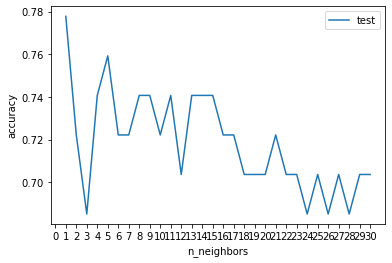

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1,31),test_acc,label="test")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0,31,step=1))
plt.legend()
plt.show()

### 3. svm 을 이용
#### 와인 등급을 분류하는 모델을 kenel을 이용해 만들고, 모델 성능을 평가하시오.

In [38]:
cif_poly=svm.SVC(kernel='poly',degree=4)
cif_poly.fit(x_train,y_train)
y_pred_poly=cif_poly.predict(x_test)
print(confusion_matrix(y_test,y_pred_poly))
print(accuracy_score(y_test,y_pred_poly))

[[16  2  0]
 [ 0 21  0]
 [ 1 14  0]]
0.6851851851851852


In [39]:
cif=svm.SVC(kernel='linear')
cif.fit(x_train,y_train)
y_pred=cif.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[18  0  0]
 [ 0 21  0]
 [ 0  1 14]]
0.9814814814814815


### <더 나아가기>
#### 과제까지 모두 하신 분들 중 더 연습 하고 싶다면... 
1. (wine) 속성 데이터들을 정규화시켜 나이브베이즈, KNN, SVM 모형에 적합시키고, 정규화하지 않은 데이터와 성능 비교
2. (titanic) 나이브베이즈 KNN, SVM 모형 적합시키고, 속성값들 변경하며 성능 비교